# SMS Spam Classifier: Bernoulli Naive Bayes

The notebook is divided into the following sections:

 1. Importing and preprocessing data
 2. Building the model: Bernoulli Naive Bayes

## 1. Importing and Preprocessing Data

In [39]:
import pandas as pd
import sklearn

In [40]:
# reading the training data

df=pd.read_csv('smsspamcollection.csv',header=None)
df.head()

,0,1
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [41]:
df.columns=['Class','sms']

In [42]:
df.head()

,Class,sms
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [43]:
# number of SMSes / documents
len(df)

5572

In [44]:
# counting spam and ham instances
ham_spam= df.Class.value_counts()
ham_spam

ham     4825
spam     747
Name: Class, dtype: int64

In [45]:
#percent of spam massage
round((ham_spam[1]/(ham_spam[0]+ham_spam[1]))*100 ,2)

13.41

In [46]:
# mapping labels to 0 and 1
df['label']= df.Class.map({'ham':0,'spam':1})

In [47]:
df.head()

,Class,sms,label
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [48]:
# we can now drop the column 'Class'
df=df.drop('Class',axis=1)

In [49]:
# convert to X and y
X= df.sms
y=df.label

In [50]:
print(X.shape,y.shape)

(5572,) (5572,)


In [51]:
# splitting into test and train

from sklearn.model_selection import train_test_split

In [52]:
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.7,random_state=100)

In [53]:
X_train.head()

3730                             I'm at home. Please call
974                          what is your account number?
4583    Wow didn't think it was that common. I take it...
4028        Yes, princess. Are you going to make me moan?
1447    Looks like u wil b getting a headstart im leav...
Name: sms, dtype: object

In [54]:
# vectorizing the sentences; removing stop words

from sklearn.feature_extraction.text import CountVectorizer
vect= CountVectorizer(stop_words='english')

In [55]:
vect.fit(X_train)

CountVectorizer(stop_words='english')

In [56]:
# printing the vocabulary
vect.vocabulary_

{'home': 3114,
 'account': 733,
 'number': 4355,
 'wow': 6798,
 'didn': 2076,
 'think': 6112,
 'common': 1733,
 'ur': 6439,
 'freak': 2673,
 'unless': 6410,
 'chop': 1630,
 'yes': 6867,
 'princess': 4837,
 'going': 2849,
 'make': 3897,
 'moan': 4080,
 'looks': 3775,
 'like': 3693,
 'wil': 6713,
 'getting': 2812,
 'headstart': 3028,
 'im': 3236,
 'leaving': 3651,
 'bout': 1306,
 '30ish': 393,
 'desperate': 2051,
 'company': 1736,
 'head': 3023,
 'earlier': 2251,
 'goin': 2848,
 'meet': 3982,
 'rummer': 5237,
 'dont': 2172,
 'know': 3555,
 'bring': 1361,
 'food': 2631,
 'save': 5303,
 'money': 4108,
 'wedding': 6650,
 'lingerie': 3712,
 'www': 6823,
 'bridal': 1354,
 'petticoatdreams': 4623,
 'uk': 6364,
 'choose': 1628,
 'superb': 5909,
 'selection': 5368,
 'national': 4222,
 'delivery': 2024,
 'brought': 1379,
 'weddingfriend': 6651,
 'sorry': 5654,
 'll': 3737,
 'later': 3619,
 'havent': 3016,
 'got': 2875,
 'urself': 6452,
 'jacket': 3387,
 'ah': 807,
 'ugh': 6358,
 'hopefully': 3130

In [57]:
# vocab size
len(vect.vocabulary_.keys())

6914

In [58]:
# transforming the train and test datasets

X_train_transformed= vect.transform(X_train)

X_test_transformed= vect.transform(X_test)

In [59]:
print(X_train_transformed)

  (0, 3114)	1
  (1, 733)	1
  (1, 4355)	1
  (2, 1630)	1
  (2, 1733)	1
  (2, 2076)	1
  (2, 2673)	1
  (2, 6112)	1
  (2, 6410)	1
  (2, 6439)	1
  (2, 6798)	1
  (3, 2849)	1
  (3, 3897)	1
  (3, 4080)	1
  (3, 4837)	1
  (3, 6867)	1
  (4, 393)	1
  (4, 1306)	1
  (4, 1736)	1
  (4, 2051)	1
  (4, 2251)	1
  (4, 2812)	1
  (4, 2848)	1
  (4, 3023)	1
  (4, 3028)	1
  :	:
  (3895, 5099)	1
  (3895, 5857)	1
  (3895, 6033)	1
  (3895, 6195)	1
  (3895, 6429)	1
  (3896, 1486)	1
  (3896, 1709)	1
  (3896, 1938)	1
  (3896, 2879)	1
  (3896, 3661)	1
  (3897, 1591)	1
  (3897, 2903)	1
  (3897, 3417)	1
  (3897, 3474)	1
  (3897, 4052)	1
  (3897, 4113)	1
  (3897, 5010)	1
  (3897, 5361)	1
  (3898, 2253)	1
  (3898, 3430)	1
  (3898, 3774)	1
  (3898, 5964)	1
  (3899, 757)	1
  (3899, 3016)	1
  (3899, 5172)	1


##  2. Building and Evaluating the Model

In [60]:
# training the NB model and making predictions

from sklearn.naive_bayes import BernoulliNB

bnb =BernoulliNB()

# fit
bnb.fit(X_train_transformed,y_train)

# predict class
y_pred_class = bnb.predict(X_test_transformed)

# predict probabilities
y_pred_proba = bnb.predict_proba(X_test_transformed)

In [61]:
# note that alpha=1 is used by default for smoothing
bnb

BernoulliNB()

## Model Evaluation

In [62]:
# printing the overall accuracy

from sklearn import metrics
metrics.accuracy_score(y_test,y_pred_class)

0.9736842105263158

In [63]:
# confusion matrix
metrics.confusion_matrix(y_test,y_pred_class)

array([[1447,    1],
       [  43,  181]], dtype=int64)

In [64]:
confusion = metrics.confusion_matrix(y_test,y_pred_class)
print(confusion)
TN = confusion[0,0]
FP = confusion[0,1]
FN = confusion[1,0]
TP = confusion[1,1]


[[1447    1]
 [  43  181]]


In [65]:
sensitivity = TP / float(FN + TP)
print("sensitivity",sensitivity)

sensitivity 0.8080357142857143


In [66]:
specificity = TN / float(TN+FP)

In [67]:
print("specificity",specificity)

specificity 0.9993093922651933


In [68]:
precision = TP / float(TP + FP)
print("precision",precision)
print(metrics.precision_score(y_test, y_pred_class))


precision 0.9945054945054945
0.9945054945054945


In [69]:
print("precision",precision)
print("PRECISION SCORE :",metrics.precision_score(y_test, y_pred_class))
print("RECALL SCORE :", metrics.recall_score(y_test, y_pred_class))
print("F1 SCORE :",metrics.f1_score(y_test, y_pred_class))

precision 0.9945054945054945
PRECISION SCORE : 0.9945054945054945
RECALL SCORE : 0.8080357142857143
F1 SCORE : 0.8916256157635467


In [70]:
y_pred_class

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [71]:
y_pred_proba

array([[9.99999995e-01, 5.42712179e-09],
       [9.99999823e-01, 1.76728837e-07],
       [4.20184733e-14, 1.00000000e+00],
       ...,
       [1.00000000e+00, 9.11066946e-12],
       [1.00000000e+00, 4.27040228e-10],
       [9.99999999e-01, 7.98878707e-10]])

In [72]:
#creating an ROC curve
from sklearn.metrics import confusion_matrix as sk_confusion_matrix
from sklearn.metrics import roc_curve,auc
import matplotlib.pyplot as plt
false_positive_rate, true_positive_rate , thresholds =roc_curve(y_test,y_pred_proba[:,1])
roc_auc = auc(false_positive_rate, true_positive_rate)

In [73]:
# area under the curve
print(roc_auc)

0.9942562401341752


In [74]:
# matrix of thresholds, tpr, fpr
pd.DataFrame({'Threshold': thresholds, 
              'TPR': true_positive_rate, 
              'FPR':false_positive_rate
             })

,Threshold,TPR,FPR
0,2.000000e+00,0.000000,0.000000
1,1.000000e+00,0.241071,0.000000
2,1.000000e+00,0.272321,0.000000
3,1.000000e+00,0.281250,0.000000
4,1.000000e+00,0.312500,0.000000
...,...,...,...
177,1.111432e-12,1.000000,0.900552
178,1.069267e-12,1.000000,0.906077
179,4.996374e-13,1.000000,0.930939
180,4.968192e-13,1.000000,0.932320


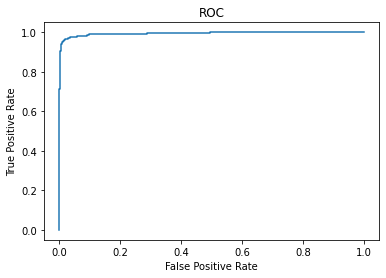

In [75]:
# plotting the ROC curve
%matplotlib inline  
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC')
plt.plot(false_positive_rate, true_positive_rate)